## Module Dependency

In [1]:
%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

plt.rcParams['figure.figsize'] = (10.0, 8.0)

## Read Image File

Format: BMP, Size: (1200, 800), Mode: RGB


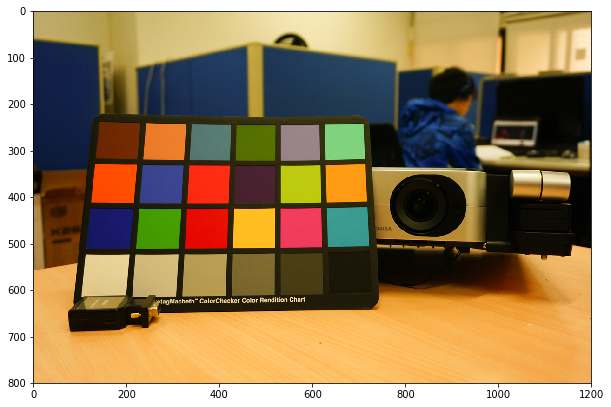

In [2]:
image = Image.open('./data/input1.bmp')

print('Format: {}, Size: {}, Mode: {}'.format(image.format, image.size, image.mode))
plt.imshow(image)

## Check the size of the image

In [3]:
img_data = np.asarray(image)
img_data.shape

(800, 1200, 3)

## Split R, G and B, then plot their histogram

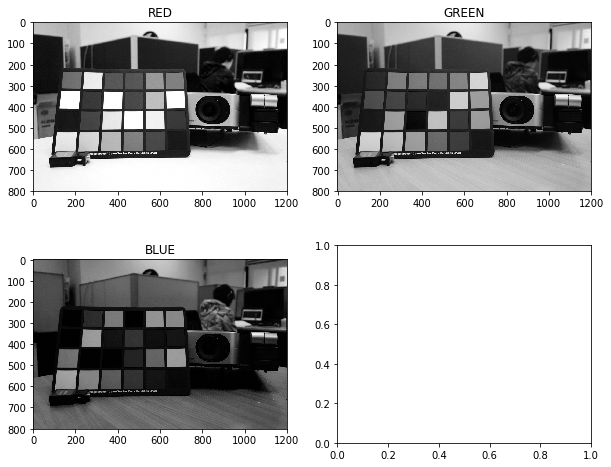

In [4]:
r, g, b = image.split()

fig, axs = plt.subplots(2,2)
axs[0, 0].imshow(r, cmap='gray')
axs[0, 0].set_title('RED')
axs[0, 1].imshow(g, cmap='gray')
axs[0, 1].set_title('GREEN')
axs[1, 0].imshow(b, cmap='gray')
axs[1, 0].set_title('BLUE')
plt.show()

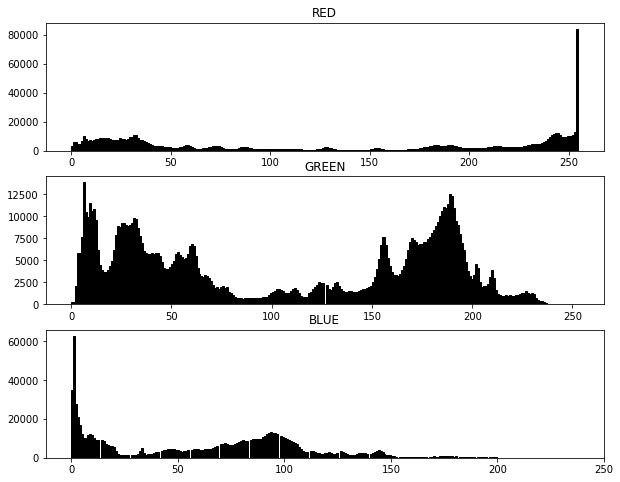

In [5]:
r = np.asarray(r)
g = np.asarray(g)
b = np.asarray(b)
# plt.hist(r.ravel(), fc='k', ec='k')

fig, axs = plt.subplots(3)
axs[0].hist(r.ravel(), fc='k', ec='k', bins=255)
axs[0].set_title('RED')
axs[1].hist(g.ravel(), fc='k', ec='k', bins=255)
axs[1].set_title('GREEN')
axs[2].hist(b.ravel(), fc='k', ec='k', bins=255)
axs[2].set_title('BLUE')
plt.show()

## Three points white balance

### Create a new storage for image after white balance

In [6]:
new_image = np.asarray(image).astype('float32')
new_image

array([[[ 201.,  180.,  126.],
        [ 198.,  174.,  117.],
        [ 198.,  175.,  116.],
        ..., 
        [ 143.,  114.,   51.],
        [ 150.,  113.,   51.],
        [ 157.,  122.,   63.]],

       [[ 195.,  175.,  109.],
        [ 191.,  170.,  102.],
        [ 193.,  170.,  102.],
        ..., 
        [ 145.,  116.,   42.],
        [ 148.,  114.,   41.],
        [ 156.,  123.,   52.]],

       [[ 195.,  178.,  113.],
        [ 192.,  171.,  104.],
        [ 193.,  172.,  105.],
        ..., 
        [ 159.,  128.,   53.],
        [ 161.,  131.,   53.],
        [ 169.,  140.,   67.]],

       ..., 
       [[ 242.,  183.,  106.],
        [ 239.,  178.,   93.],
        [ 240.,  177.,   92.],
        ..., 
        [ 242.,  172.,   88.],
        [ 241.,  172.,   92.],
        [ 241.,  178.,  106.]],

       [[ 241.,  183.,  106.],
        [ 239.,  182.,   99.],
        [ 239.,  179.,   98.],
        ..., 
        [ 242.,  173.,   89.],
        [ 242.,  174.,   91.],
        [ 

### Assign white, gray and black point, then reshape the array in (3, height\*width)

In [7]:
white_pixel = new_image[550][180]
black_pixel = new_image[550][650]
gray_pixel = new_image[550][480]
new_image = np.transpose(new_image, (2, 0, 1)).reshape(3, -1)

### Solve a quadratic function by given known three (x, y) pairs

In [8]:
X = np.array([
    [1, white_pixel[0], (white_pixel[0])**2]+[0]*6,
    [1, black_pixel[0], (black_pixel[0])**2]+[0]*6,
    [1, gray_pixel[0], (gray_pixel[0])**2]+[0]*6,
    [0]*3+[1, white_pixel[1], (white_pixel[1])**2]+[0]*3,
    [0]*3+[1, black_pixel[1], (black_pixel[1])**2]+[0]*3,
    [0]*3+[1, gray_pixel[1], (gray_pixel[1])**2]+[0]*3,
    [0]*6+[1, white_pixel[2], (white_pixel[2])**2],
    [0]*6+[1, black_pixel[2], (black_pixel[2])**2],
    [0]*6+[1, gray_pixel[2], (gray_pixel[2])**2],
]).astype('float32')
Y = np.array([243, 52, 122, 243, 52, 122, 242, 52, 121]).astype('float32').reshape(-1, 1)
print(X.shape)
print(Y.shape)

(9, 9)
(9, 1)


### Get parameters of quadratic function

In [9]:
X_inv = np.linalg.inv(X)
C = np.matmul(X_inv, Y)
C = C.flatten()
C
# Y.shape

array([  4.25959015e+01,   3.59453678e-01,   2.14871205e-03,
         3.52694168e+01,   6.94461346e-01,   1.43284607e-03,
         4.09230270e+01,   1.86700082e+00,  -3.47309560e-03], dtype=float32)

### Build the quadratic function

In [10]:
bias = np.array([
    [C[0], 0, 0],
    [0, C[3], 0],
    [0, 0, C[6]]
])

one_const = np.array([
    [C[1], 0, 0],
    [0, C[4], 0],
    [0, 0, C[7]]
])

two_const = np.array([
    [C[2], 0, 0],
    [0, C[5], 0],
    [0, 0, C[8]]
])

### Transfer all pixel to new value by the function

In [11]:
two_term = np.matmul(two_const, new_image**2)
one_term = np.matmul(one_const, new_image)
new_image = two_term + one_term
new_image[0] += C[0]
new_image[1] += C[3]
new_image[2] += C[6]
new_image = np.transpose(new_image.reshape(3, 800, 1200), (1, 2, 0))
new_image

array([[[ 201.65620648,  206.69667162,  221.02626446],
        [ 198.00583712,  199.48653849,  211.81891716],
        [ 198.00583712,  200.68106312,  210.76114762],
        ..., 
        [ 137.93679025,  133.05927771,  127.10654712],
        [ 144.85997442,  132.03956031,  127.10654712],
        [ 151.99373237,  141.32018185,  144.75936217]],

       [[ 194.39414457,  200.68106312,  203.16226745],
        [ 189.63871845,  194.73709692,  195.22302392],
        [ 192.00783666,  194.73709692,  195.22302392],
        ..., 
        [ 139.89335575,  135.10730959,  113.21052077],
        [ 142.86043468,  133.05927771,  111.63178689],
        [ 150.96173182,  142.36569048,  128.6158191 ]],

       [[ 194.39414457,  204.28183114,  207.54616184],
        [ 190.82112885,  195.92015878,  197.52611017],
        [ 192.00783666,  197.10608632,  198.66723401],
        ..., 
        [ 154.07062575,  147.63621902,  130.11814488],
        [ 156.16470882,  150.83292446,  130.11814488],
        [ 164.71293

### Truncate some values not in normal range and print the image

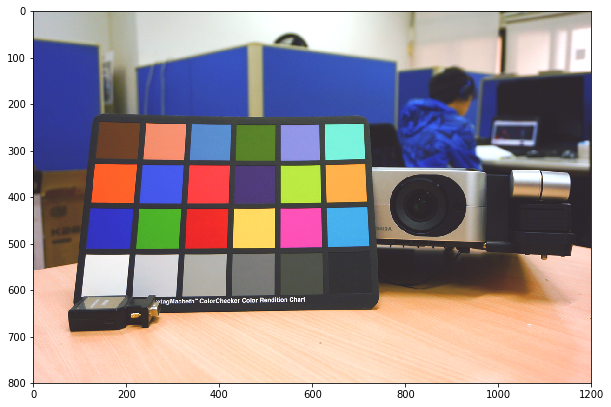

In [12]:
new_image[new_image > 255] = 255
new_image[new_image < 0] = 0
new_image = new_image.astype(np.uint8)
plt.imshow(new_image)

### Save the file

In [13]:
new_image = Image.fromarray(new_image)
new_image.save('./data/wb.bmp')

## "Pure" white balance

### Create space for image

In [14]:
pure_image = np.asarray(image).astype('float32')
pure_image

array([[[ 201.,  180.,  126.],
        [ 198.,  174.,  117.],
        [ 198.,  175.,  116.],
        ..., 
        [ 143.,  114.,   51.],
        [ 150.,  113.,   51.],
        [ 157.,  122.,   63.]],

       [[ 195.,  175.,  109.],
        [ 191.,  170.,  102.],
        [ 193.,  170.,  102.],
        ..., 
        [ 145.,  116.,   42.],
        [ 148.,  114.,   41.],
        [ 156.,  123.,   52.]],

       [[ 195.,  178.,  113.],
        [ 192.,  171.,  104.],
        [ 193.,  172.,  105.],
        ..., 
        [ 159.,  128.,   53.],
        [ 161.,  131.,   53.],
        [ 169.,  140.,   67.]],

       ..., 
       [[ 242.,  183.,  106.],
        [ 239.,  178.,   93.],
        [ 240.,  177.,   92.],
        ..., 
        [ 242.,  172.,   88.],
        [ 241.,  172.,   92.],
        [ 241.,  178.,  106.]],

       [[ 241.,  183.,  106.],
        [ 239.,  182.,   99.],
        [ 239.,  179.,   98.],
        ..., 
        [ 242.,  173.,   89.],
        [ 242.,  174.,   91.],
        [ 

In [15]:
pure_image = np.transpose(pure_image, (2, 0, 1)).reshape(3, -1)
pure_image.shape

(3, 960000)

### Create mapping function

In [16]:
W = np.array([
    [243.0/white_pixel[0], 0, 0],
    [0, 243.0/white_pixel[1], 0],
    [0, 0, 242.0/white_pixel[2]]
]).astype('float32')
W.shape

(3, 3)

### Perform white balance

In [17]:
pure_image = np.matmul(W, pure_image)
pure_image = np.transpose(pure_image.reshape(3, 800, 1200), (1, 2, 0))
pure_image.shape

(800, 1200, 3)

### Truncate some values not in normal range and print the image

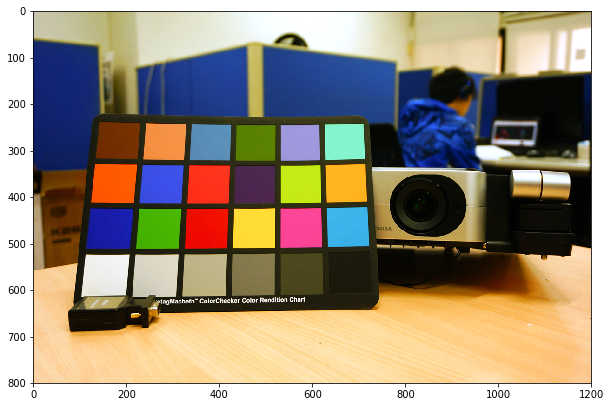

In [18]:
pure_image[pure_image > 255] = 255
pure_image[pure_image < 0] = 0
pure_image = pure_image.astype(np.uint8)
plt.imshow(pure_image)

### Save the file

In [19]:
pure_image = Image.fromarray(pure_image)
pure_image.save('./data/wb_test.bmp')